In [1]:
##DESCRIPTION
# This notebook calculates the so called "Polygons" to describe how a system under test reacts to a set of performance tests.


In [2]:
install.packages("RColorBrewer", repos='http://cran.us.r-project.org')
install.packages("gridExtra")
install.packages("getPass")
install.packages("RSQLite")

library("RColorBrewer")
library(ggplot2)
library(gridExtra)
library(getPass)
library(RSQLite)
library(dplyr)
library(stringr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
db_connection <- dbConnect(RSQLite::SQLite(), "pptam.db")
dbGetQuery(db_connection, "SELECT id, name FROM projects") 

id,name
<chr>,<chr>
270ef577-5fbf-4200-a61c-46b6afebc74b,Demo Project
59db96f1-314d-49a0-9448-851347053b7f,todolist


In [4]:
# Define the name of the project to analyze
project_name <- "todolist"

project_id = dbGetQuery(db_connection, str_glue("SELECT id FROM projects WHERE name='{project}'", project = project_name))$id

project_id

[1] "59db96f1-314d-49a0-9448-851347053b7f"

In [5]:
sql_operational_profile = "
    SELECT users, frequency FROM operational_profile_observations 
        WHERE operational_profile = (SELECT id FROM operational_profiles WHERE project = ?project) order by users"
operational_profile <- dbGetQuery(db_connection, DBI::sqlInterpolate(db_connection, sql_operational_profile, project = project_id))
operational_profile[,1] <- operational_profile[,1]
operational_profile
  


users,frequency
<int>,<int>
10,0
11,0
12,0
13,0
14,0
15,3
16,11
17,6
18,6


In [21]:
sql_all_data = "
    SELECT tests.id AS test_id, test_sets.id AS test_set_id, CAST(test_properties.value as integer) AS users, metrics.abbreviation AS metric, items.name AS item_name, results.value AS item_value
        FROM results 
        INNER JOIN tests ON results.test = tests.id
        INNER JOIN items ON results.item = items.id
        INNER JOIN test_properties ON (test_properties.test = tests.id AND test_properties.name = 'load')
        INNER JOIN metrics ON results.metric = metrics.id 
        INNER JOIN test_set_tests ON (test_set_tests.test = tests.id)
        INNER JOIN test_sets ON (test_sets.id = test_set_tests.test_set AND test_sets.project = tests.project)
        WHERE tests.project = ?project AND metrics.abbreviation IN ('art', 'sdrt', 'mix')"

all_data = dbGetQuery(db_connection, DBI::sqlInterpolate(db_connection, sql_all_data, project = project_id))

list_of_microservices = as.data.frame(unique(all_data[,5]))
no_of_microservices = nrow(list_of_microservices)

test_users_metric<-unique(all_data[,c(1:4)])
test_users_metric

,test_id,test_set_id,users,metric
,<chr>,<chr>,<int>,<chr>
1,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,art
2,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,sdrt
3,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,mix
16,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,art
17,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,sdrt
18,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,mix
31,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,art
32,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,sdrt
33,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,mix


In [7]:
test_users_metric[list_of_microservices[,1]]<-NA
test_users_metric

,test_id,test_set_id,users,metric,ToDo-Get-Single,ToDo-Get-All,ToDo-Update,ToDo-Delete,ToDo-Create
,<chr>,<chr>,<int>,<chr>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,art,NA,NA,NA,NA,NA
2,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,sdrt,NA,NA,NA,NA,NA
3,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,mix,NA,NA,NA,NA,NA
16,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,art,NA,NA,NA,NA,NA
17,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,sdrt,NA,NA,NA,NA,NA
18,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,mix,NA,NA,NA,NA,NA
31,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,art,NA,NA,NA,NA,NA
32,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,sdrt,NA,NA,NA,NA,NA
33,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,mix,NA,NA,NA,NA,NA


In [8]:
#If the tests occur too fast, it might be that some services have no data. This case is not handled, yet.

for (i in 1:nrow(test_users_metric)) {
    search_test_id <- test_users_metric[i,1]
    search_metric <- test_users_metric[i,4]
    
    for (j in 1:no_of_microservices) {
        search_microservice <- list_of_microservices[j,]
        
        row <- filter(all_data, test_id == search_test_id & metric == search_metric & item_name == search_microservice)
        
        if (dim(row)[1] > 0) {
            found_value = row$item_value
            
            if  (!is.na(found_value)) {
                test_users_metric[i,j+4] <- found_value
            } else {
                test_users_metric[i,j+4] <- 99999999.00 
                print("NA=toobig")
            }
        } else {
            test_users_metric[i,j+4] <- 99999999.00
        }
    }
}
raw_data <- test_users_metric
raw_data


,test_id,test_set_id,users,metric,ToDo-Get-Single,ToDo-Get-All,ToDo-Update,ToDo-Delete,ToDo-Create
,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,art,212.6250000,222.5000000,206.6000000,3.140000e+02,227.7500000
2,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,sdrt,24.4444444,51.1111111,16.2962963,8.185185e+01,28.8888889
3,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,mix,0.3333333,0.1666667,0.2777778,5.555556e-02,0.1666667
16,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,art,216.9484979,243.1578947,240.2487047,2.746615e+02,350.9913793
17,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,sdrt,40.0000000,29.4444444,41.4814815,3.925926e+01,44.4444444
18,bbd36f04-7c6e-4317-8ebb-0450b7797f77,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,10,mix,0.3231623,0.1581137,0.2676838,9.015257e-02,0.1608877
31,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,art,150.8372093,182.7805907,152.1580311,1.832114e+02,150.3750000
32,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,sdrt,25.9259259,38.5185185,26.6666667,3.666667e+01,26.6666667
33,6bea2e25-9efe-4383-b5e2-3ca6bd6cf10c,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,20,mix,0.3241947,0.1624400,0.2645648,8.430432e-02,0.1644962


In [93]:
tests <- unique(raw_data[,1:3]) 
#max number for which test was made
max_no_of_users <- max(raw_data[,3])
min_no_of_users <- min(raw_data[,3])
user_load <- operational_profile[,1]
access_count <- operational_profile[,2]
max_no_of_requests <- max(user_load)
scale_factor <- max_no_of_users/max_no_of_requests
scaled_user_load <- floor(scale_factor * user_load)

#insert bin separation  sorted by access_count = 0 and scaled_user_load = bins) into the scaled_user_load and then remove duplicates
# Take these vectors as input to the array.
op = data.frame(users = scaled_user_load, frequency = access_count)

#create bins
bins = data.frame(users = c(0, 20, 40, 80, 100), frequency = c(0, 0, 0, 0, 0))
#cat bin to end of op
temp_op <- rbind(op, bins)
#sort temp_op by users
newSorted <- temp_op[order(temp_op$users),]
#remove duplicates
mergedSorted <- distinct(newSorted,users,.keep_all=TRUE)
scaled_user_load <- mergedSorted[,1]
access_count <- mergedSorted[,2]

access_count


[1]  0  0  0  0  0  0  3 11  6  6  6  8  2  4  2  2  4  4  8  7  7  7  7  6  5
[26]  1  4  3  3  4 10 13 21 10 20 12 19 25 28 26 18 16 17

In [105]:
##Create aggregate values (by fifty) of the user frequency from "operational_profile" 

steps <- 10

calculate_aggregated_values <- function() {    
    access_frequency <- access_count/sum(access_count)
    by_fifty <- which((scaled_user_load %% steps) == 0)
    print(by_fifty)
    #hack need to rewrite to be general
    #values_by_bin <- c(scaled_user_load[seq(1, length(scaled_user_load), 6)])
    #by_fifty <- match(values_by_bin,scaled_user_load)
    #by_fifty <- c(1,14,26,31,34,38,41)
    print(by_fifty)
    no_of_aggregated_rows = length(by_fifty)
    print (no_of_aggregated_rows)
    binProb <- c()
    for (i in 1:no_of_aggregated_rows) {
        if (i==1) {
            binProb[i] <- sum(access_frequency[1:by_fifty[i]])
        } else {
            binProb[i] <- sum(access_frequency[(by_fifty[i-1]+1):by_fifty[i]])
        }
          print(binProb[i])
    }
  

    matrix(c(scaled_user_load[by_fifty], binProb), ncol=2, nrow=no_of_aggregated_rows, dimnames=list(c(1:no_of_aggregated_rows), c("Workload (number of users)", "Domain metric per workload")))
}

#todo - replace duplicate entries

aggregated_values_from_operational_profile <- calculate_aggregated_values()
#aggregated_values_from_operational_profile
#fix to match test data
#hack need to rewrite to be general

#aggregated_values_from_operational_profile[,1] <- c(0,50,100,150,200,250,300)
aggregated_values_from_operational_profile

 [1]  1  2 12 17 27 32 35 37 39 41 43
 [1]  1  2 12 17 27 32 35 37 39 41 43
[1] 11
[1] 0
[1] 0
[1] 0.1126761
[1] 0.03943662
[1] 0.1577465
[1] 0.09295775
[1] 0.143662
[1] 0.08732394
[1] 0.1492958
[1] 0.1239437
[1] 0.09295775


,Workload (number of users),Domain metric per workload
1,0,0.00000000
2,10,0.00000000
3,20,0.11267606
4,30,0.03943662
5,40,0.15774648
6,50,0.09295775
7,60,0.14366197
8,70,0.08732394
9,80,0.14929577
10,90,0.12394366


In [106]:
#Define the threshold for each service. The threshold is a vector computed as avg+3*SD for the configuration with 
#Users=2, Memory=4, CPU=1, CartReplica=1   

data_of_min_user<-raw_data[raw_data$users==min_no_of_users,]
test_of_min_user<-tests[tests$users==min_no_of_users,]

avg <-data_of_min_user[data_of_min_user$metric=="art",][,-c(1:4)]
sd <- data_of_min_user[data_of_min_user$metric=="sdrt",][,-c(1:4)]
threshold<-data.frame(test_of_min_user,avg+3*sd)
threshold
#Check the first line of the dataframe thereshold: it must be one line
#head(threshold)
#data_of_min_user

,test_id,test_set_id,users,ToDo.Get.Single,ToDo.Get.All,ToDo.Update,ToDo.Delete,ToDo.Create
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,06803d6b-aca5-49c2-b041-0264357ad2be,0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,1,285.9583,375.8333,255.4889,559.5556,314.4167


In [107]:
#Exclude case with user = 2 from dataFile and check whether each service passes or fail: avg<threshol (Pass). 
#Compute the relative mass for each configuration

tests_without_benchmark<-tests[!tests$users==min_no_of_users,]
raw_data_without_benchmark<-raw_data[!raw_data$users==min_no_of_users,]

avg<-raw_data_without_benchmark[raw_data_without_benchmark$metric=="art",-4]
sd<-raw_data_without_benchmark[raw_data_without_benchmark$metric=="sdrt",-4]
mix<-raw_data_without_benchmark[raw_data_without_benchmark$metric=="mix",-4]


#Check pass/fail for each service. the "mix" value is 0 if fail and mixTemp if pass. Compute the relative mass for each configuration
pass_criteria<-avg


calculate_relative_mass <- function() {    
    relative_mass<-c()

    mix_of_passing_tests<-as.data.frame(matrix(nrow=nrow(tests_without_benchmark), ncol=ncol(raw_data_without_benchmark)-1))

    for(j in 1:nrow(pass_criteria)){
        #print (j)
        mix_of_passing_tests[j,]<-mix[j,]
        for(i in 4:(3+no_of_microservices)){
            #print (i)
            #print (pass_criteria[j,i])
            #print (threshold[i])
            if (!is.na(threshold[i]) & !is.na(pass_criteria[j,i])) {
                if(pass_criteria[j,i]>threshold[i]){
                    #print ("fail")
                    mix_of_passing_tests[j,i]<-0
                } #else print ("pass")
            } #else print ("NA")
        } 
        relative_mass[j]<-sum(mix_of_passing_tests[j,4:(3+no_of_microservices)])
    }
   
    relative_mass
}

relative_mass <- calculate_relative_mass()

#Show first lines of passCriteria
relative_mass

[1] 0.8391123 1.0000000 1.0000000 0.7347434 0.7310534 0.5724959 0.0000000
 [8] 0.0000000 0.0000000 0.0000000 1.0000000 1.0000000 1.0000000 1.0000000
[15] 1.0000000 1.0000000 1.0000000 0.8403478 0.8380260 0.2461081

In [109]:
#Compute the domain metric for each configuration
tests_without_benchmark$relative_mass<-relative_mass

absolute_mass<-c()

for(j in 1:nrow(tests_without_benchmark)) {
    print (tests_without_benchmark[j, "users"])
    absolute_mass[j]<-tests_without_benchmark[j,"relative_mass"]*aggregated_values_from_operational_profile[match(tests_without_benchmark[j, "users"], aggregated_values_from_operational_profile[,1]),2]
  
    print (absolute_mass[j])
}
tests_without_benchmark$absolute_mass<-absolute_mass

test_sets<-as.data.frame(unique(all_data[,2]))
colnames(test_sets)[1] <- "test_set_id"

set<-list()
domain_metric_list<-list()
for(i in 1:nrow(test_sets)){
    set[[i]]<-tests_without_benchmark[which(tests_without_benchmark[,2] == test_sets[i,1]),]
    domain_metric_list[[i]]<-set[[i]][,c(3,5)][order(set[[i]][,c(3,5)][,1]),]
}

#Uncomment this to show first lines of domain_metric_list
#head(domain_metric_list)
print("domain metric list")
domain_metric_list

[1] 10
[1] 0
[1] 20
[1] 0.1126761
[1] 30
[1] 0.03943662
[1] 40
[1] 0.1159032
[1] 50
[1] 0.06795707
[1] 60
[1] 0.08224589
[1] 70
[1] 0
[1] 80
[1] 0
[1] 90
[1] 0
[1] 100
[1] 0
[1] 10
[1] 0
[1] 20
[1] 0.1126761
[1] 30
[1] 0.03943662
[1] 40
[1] 0.1577465
[1] 50
[1] 0.09295775
[1] 60
[1] 0.143662
[1] 70
[1] 0.08732394
[1] 80
[1] 0.1254604
[1] 90
[1] 0.103868
[1] 100
[1] 0.02287766
[1] "domain metric list"


,users,absolute_mass
,<int>,<dbl>
16,10,0.00000000
31,20,0.11267606
46,30,0.03943662
61,40,0.11590319
76,50,0.06795707
91,60,0.08224589
106,70,0.00000000
121,80,0.00000000
136,90,0.00000000


In [111]:
#Compute Cumulative Domain metric: summing up absoluteMass over users for each configuration
test_sets$domain_metric<-0
for(i in 1:nrow(test_sets)){
    test_sets[i,2]<-round(sum(tests_without_benchmark[which(tests_without_benchmark[,2] == test_sets[i,1]),"absolute_mass"]),4)
}
domain_metric<-test_sets

domain_metric

test_set_id,domain_metric
<chr>,<dbl>
0fd2505f-4709-4a4b-aeb2-4c593dd9e8de,0.4182
cdcdd86e-5f82-4c8e-9263-1e8216ecc525,0.8860


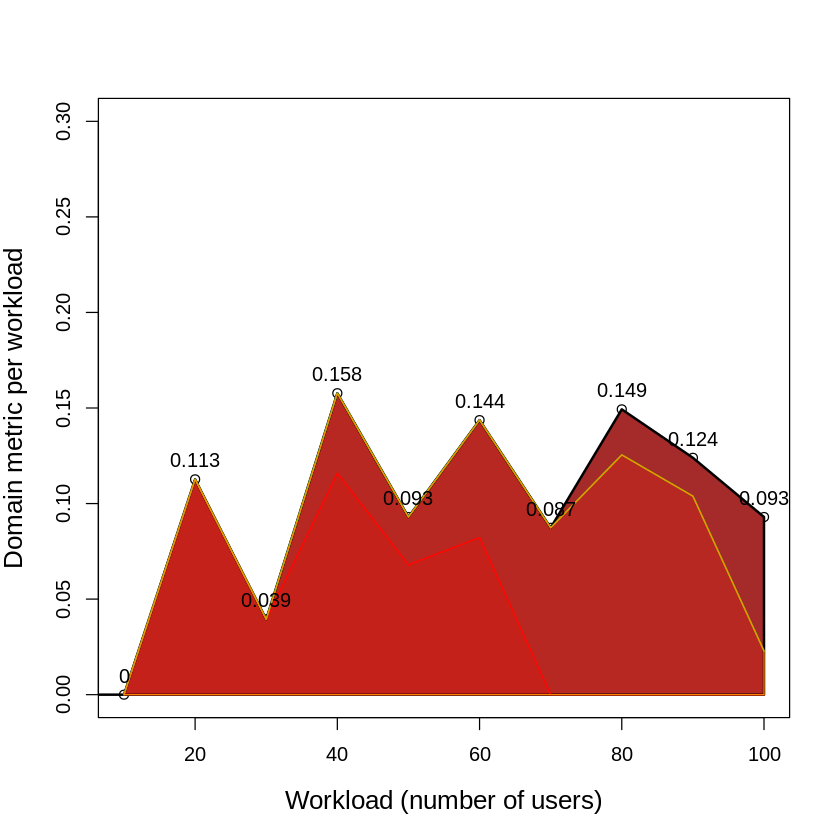

In [112]:
#Plot operational_profile against domain metric for each configuration

plot(aggregated_values_from_operational_profile, xlim=c(steps, max_no_of_users), ylim=c(0, 0.3),cex.lab=1.3)
polygon(c(steps,aggregated_values_from_operational_profile[,1],max_no_of_users),c(0,aggregated_values_from_operational_profile[,2],0), col="brown", lty = 1, lwd = 2, border = "black")
color=heat.colors(11)
color_transparent <- adjustcolor(color, alpha.f = 0.2) 

sorted_domain_metric<-domain_metric
k<-which(sorted_domain_metric[,2]==max(sorted_domain_metric[,2]))
#Green line whithin the polygon is the best domain matric line. 
#It corresponds to the second line in the final table below

for(i in 1:nrow(test_sets)) {
    lines(domain_metric_list[[i]], type="l", col=heat.colors(11)[i])    
    lines(domain_metric_list[[k]], type="l", col="green")
    polygon(c(steps,t(domain_metric_list[[i]][1]),max_no_of_users),c(0,t(domain_metric_list[[i]][2]),0), col=color_transparent[i], lty = 1, lwd = 1 , border = rainbow(11)[i])
}

text(aggregated_values_from_operational_profile,labels = round(aggregated_values_from_operational_profile[,2],3), pos=3, col="black")

graphics.off()

In [ ]:
DBI::dbDisconnect(db_connection)